## Preproocessing on Caption using NLP

### Import Necessaries

In [45]:
#Caption(Text) Processing
#Import Spacy
import re
import spacy
import json
import pandas as pd
import numpy as np
import shutil
import os
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

In [46]:
#Read json file
with open('photo_json.json') as data_file:
    data=json.load(data_file)

In [47]:
#Convert to DataFrame
df=DataFrame(data['photojson'])

In [48]:
#Only caption data
df_caption = df[df['caption']!=""]

In [49]:
#Append dataframe by number of words in the caption
df_caption['number_of_words'] = df_caption.caption.apply(lambda x: len(x.split()))
nor_imgs=len(df_caption)

#Average number of words per image caption before prerocessing
sum=df_caption['number_of_words'].sum()
avg=sum/nor_imgs
print("Average number of words per image in caption before preprocessing: %f"%(avg))

Average number of words per image in caption before preprocessing: 5.538535


C:\Users\BASAVARAJ\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [50]:
#Caption list before preprocessing
captioned = df_caption['caption'].tolist()

In [51]:
#Load spacy model
nlp = spacy.load('en_core_web_sm', disable=['tagger', 'parser', 'ner'])
nlp.add_pipe(nlp.create_pipe('sentencizer'))

### Captioned Image Dataframe

In [52]:
#Caption dataframe
df_caption

,caption,photo_id,business_id,label,number_of_words
16,Outside,-bpyOFpGiJsOzh_y17cTMQ,-KIdCJnkt5N8rnnmWR5MQg,outside,1
18,"""last neighborhood bar in Vegas""",YkW51dD0Hzw1572XLzrV5w,JIl4gbnh_cORSjSrZgOjAQ,outside,5
19,now this is a sandwich,fFf5HfvOZZBM_u-9fFSiHw,zU9w_xRlQSRIYXxGo-HSOA,food,5
20,Kai Restaurant,VTRKZpezwa25pyc8ePWLQQ,AkpuhGyLAxhD_sLMQv3kOg,inside,2
21,Resort lounge.,2fp5KiQd91qw351ea2V4Xw,AkpuhGyLAxhD_sLMQv3kOg,inside,2
...,...,...,...,...,...
199989,Takoyaki,iamvSe9AVHrFhgoWI7cGhA,ZAuAwz1ijuydn5yL3q3rzA,food,1
199990,Scottsdale Restaurants,af30H63e0E_jmOBBXxqyQQ,04L9uKk6OixQ7ForUfPQLw,drink,2
199991,Asian fusion Scottsdale,Beg6NltQC2dj79SBtFmZeg,04L9uKk6OixQ7ForUfPQLw,food,3
199992,Cocktails in Scottsdale,dg1dta9889cJxToHLq7uHw,04L9uKk6OixQ7ForUfPQLw,drink,3


### Caption Cleaner function for Alphanumeric 

In [53]:
#Define text cleaner as new attribute
def cleaner(df):
    "Extract relevant text from DataFrame using a regex"
    # Regex pattern for only alphanumeric, hyphenated text with 3 or more chars
    pattern = re.compile(r"[A-Za-z0-9\-]{3,50}")
    df['clean'] = df['caption'].str.findall(pattern).str.join(' ')

    return df

In [54]:
df_preproc = cleaner(df_caption)
df_preproc


C:\Users\BASAVARAJ\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,caption,photo_id,business_id,label,number_of_words,clean
16,Outside,-bpyOFpGiJsOzh_y17cTMQ,-KIdCJnkt5N8rnnmWR5MQg,outside,1,Outside
18,"""last neighborhood bar in Vegas""",YkW51dD0Hzw1572XLzrV5w,JIl4gbnh_cORSjSrZgOjAQ,outside,5,last neighborhood bar Vegas
19,now this is a sandwich,fFf5HfvOZZBM_u-9fFSiHw,zU9w_xRlQSRIYXxGo-HSOA,food,5,now this sandwich
20,Kai Restaurant,VTRKZpezwa25pyc8ePWLQQ,AkpuhGyLAxhD_sLMQv3kOg,inside,2,Kai Restaurant
21,Resort lounge.,2fp5KiQd91qw351ea2V4Xw,AkpuhGyLAxhD_sLMQv3kOg,inside,2,Resort lounge
...,...,...,...,...,...,...
199989,Takoyaki,iamvSe9AVHrFhgoWI7cGhA,ZAuAwz1ijuydn5yL3q3rzA,food,1,Takoyaki
199990,Scottsdale Restaurants,af30H63e0E_jmOBBXxqyQQ,04L9uKk6OixQ7ForUfPQLw,drink,2,Scottsdale Restaurants
199991,Asian fusion Scottsdale,Beg6NltQC2dj79SBtFmZeg,04L9uKk6OixQ7ForUfPQLw,food,3,Asian fusion Scottsdale
199992,Cocktails in Scottsdale,dg1dta9889cJxToHLq7uHw,04L9uKk6OixQ7ForUfPQLw,drink,3,Cocktails Scottsdale


### Lemmatization : 
Returning lemmas found from the caption.

**Lemmatization** usually refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma .

In [55]:
#Lemmatization
#Sequentially process DataFrame column
from nltk.corpus import stopwords
stopwords = set(stopwords.words("english"))
def lemmatize(text):
    """Perform lemmatization and stopword removal in the clean text
       Returns a list of lemmas
    """
    doc = nlp(text)
    lemma_list = [str(tok.lemma_).lower() for tok in doc
                  if tok.is_alpha and tok.text.lower() not in stopwords]
    return lemma_list

#%%time
df_preproc['preproc'] = df_preproc['clean'].apply(lemmatize)



C:\Users\BASAVARAJ\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [56]:
df_preproc[['caption', 'photo_id', 'preproc']].head(10)

,caption,photo_id,preproc
16,Outside,-bpyOFpGiJsOzh_y17cTMQ,[outside]
18,"""last neighborhood bar in Vegas""",YkW51dD0Hzw1572XLzrV5w,"[last, neighborhood, bar, vegas]"
19,now this is a sandwich,fFf5HfvOZZBM_u-9fFSiHw,[sandwich]
20,Kai Restaurant,VTRKZpezwa25pyc8ePWLQQ,"[kai, restaurant]"
21,Resort lounge.,2fp5KiQd91qw351ea2V4Xw,"[resort, lounge]"
23,"Not the Blueberry Hill I go to, but close enough.",CGQz5KfDrUvMh3fIfrgk8A,"[blueberry, hill, close, enough]"
26,The counter at Matt's Big Breakfast. I have a ...,wNTCPtF_FfxL-aPfg6_-8w,"[counter, matt, big, breakfast, strong, hunch,..."
28,A typical table at Coronado Cafe,yxkz1OIxe9hJAfTK_wYQ6w,"[typical, table, coronado, cafe]"
31,from their website,_KKnMFElktEuOl5y6LdThg,[website]
32,From in front of the booth - you can see back ...,lY5tXCnwtGXY9E8yUuqKdQ,"[front, booth, see, back, kitchen]"


### Stop words Removal
 **Stopword:** A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore, both when indexing entries for searching and when retrieving them as the result of a search query.
 
  We can remove them easily, by storing a list of words that you consider to stop words. NLTK(Natural Language Toolkit)

In [57]:
#Effect of chunk size and batch size
#Sets vs. Lists
#Important: Use sets over lists for lookups wherever possible.
stopwords = list(stopwords)

In [58]:
df_preproc['preproc_stopword_list'] = df_preproc['clean'].apply(lemmatize)
df_preproc[['caption', 'photo_id', 'preproc']].head(10)

C:\Users\BASAVARAJ\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,caption,photo_id,preproc
16,Outside,-bpyOFpGiJsOzh_y17cTMQ,[outside]
18,"""last neighborhood bar in Vegas""",YkW51dD0Hzw1572XLzrV5w,"[last, neighborhood, bar, vegas]"
19,now this is a sandwich,fFf5HfvOZZBM_u-9fFSiHw,[sandwich]
20,Kai Restaurant,VTRKZpezwa25pyc8ePWLQQ,"[kai, restaurant]"
21,Resort lounge.,2fp5KiQd91qw351ea2V4Xw,"[resort, lounge]"
23,"Not the Blueberry Hill I go to, but close enough.",CGQz5KfDrUvMh3fIfrgk8A,"[blueberry, hill, close, enough]"
26,The counter at Matt's Big Breakfast. I have a ...,wNTCPtF_FfxL-aPfg6_-8w,"[counter, matt, big, breakfast, strong, hunch,..."
28,A typical table at Coronado Cafe,yxkz1OIxe9hJAfTK_wYQ6w,"[typical, table, coronado, cafe]"
31,from their website,_KKnMFElktEuOl5y6LdThg,[website]
32,From in front of the booth - you can see back ...,lY5tXCnwtGXY9E8yUuqKdQ,"[front, booth, see, back, kitchen]"


### Remove other language words 
Removing other language words using the language code such as
- Korean   - \uac00-\ud7a3
- japanese -\u3040-\u30ff
- chinese  - \u4e00-\u9FFF

In [59]:
#Remove items with Chinese, Japanese or Korean characters
def cjk_detect(texts):
    # korean
    if re.search("[\uac00-\ud7a3]", texts):
        return False
    # japanese
    if re.search("[\u3040-\u30ff]", texts):
        return False
    # chinese
    if re.search("[\u4e00-\u9FFF]", texts):
        return False
    return True

In [60]:
df_preproc['is_english'] = df_preproc['caption'].apply(cjk_detect)
df_preproc = df_preproc[df_preproc['is_english'] == True]


C:\Users\BASAVARAJ\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [61]:
df_preproc[['caption', 'photo_id', 'preproc','is_english']].head(10)

,caption,photo_id,preproc,is_english
16,Outside,-bpyOFpGiJsOzh_y17cTMQ,[outside],True
18,"""last neighborhood bar in Vegas""",YkW51dD0Hzw1572XLzrV5w,"[last, neighborhood, bar, vegas]",True
19,now this is a sandwich,fFf5HfvOZZBM_u-9fFSiHw,[sandwich],True
20,Kai Restaurant,VTRKZpezwa25pyc8ePWLQQ,"[kai, restaurant]",True
21,Resort lounge.,2fp5KiQd91qw351ea2V4Xw,"[resort, lounge]",True
23,"Not the Blueberry Hill I go to, but close enough.",CGQz5KfDrUvMh3fIfrgk8A,"[blueberry, hill, close, enough]",True
26,The counter at Matt's Big Breakfast. I have a ...,wNTCPtF_FfxL-aPfg6_-8w,"[counter, matt, big, breakfast, strong, hunch,...",True
28,A typical table at Coronado Cafe,yxkz1OIxe9hJAfTK_wYQ6w,"[typical, table, coronado, cafe]",True
31,from their website,_KKnMFElktEuOl5y6LdThg,[website],True
32,From in front of the booth - you can see back ...,lY5tXCnwtGXY9E8yUuqKdQ,"[front, booth, see, back, kitchen]",True


In [62]:
df_eng=df_preproc[df_preproc['is_english']==True]

In [63]:
print(len(df_eng))

92150


### Top item sets based on occurrance in caption

Text(0.5, 0, 'Number of topics')

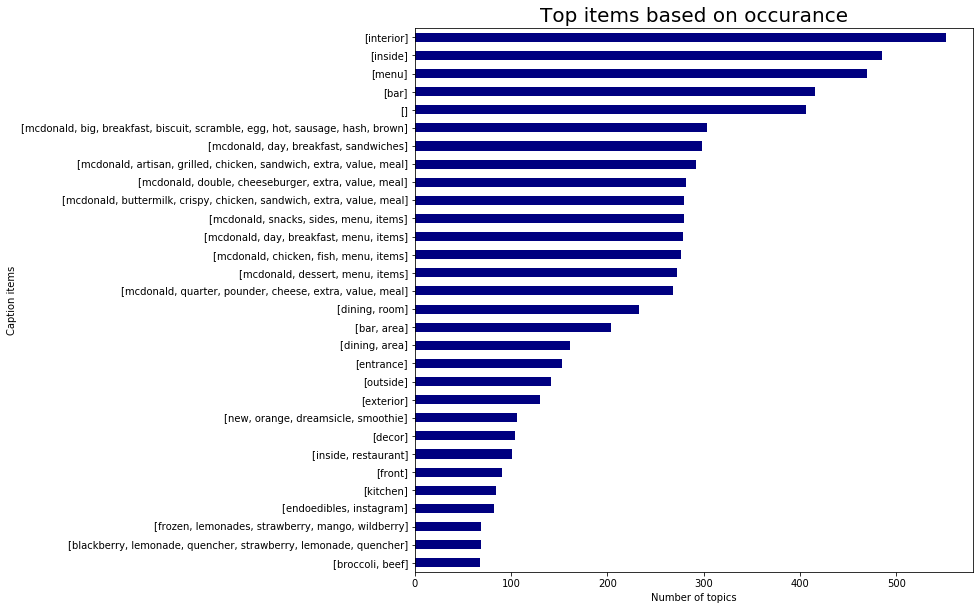

In [20]:
#Occurance of Top words
c_topics =  df_preproc['preproc'].value_counts().to_frame()[:30]
c_topics.sort_values(by='preproc', ascending=True).plot(kind='barh', colormap='jet', legend=False, figsize=(10, 10));
plt.title("Top items based on occurance",fontsize = 20)
plt.ylabel('Caption items')
plt.xlabel('Number of topics')

In [21]:
#Consider only food dataframe
df_food = df_preproc[df_preproc['label']=="food"] 

In [22]:
df_food

,caption,photo_id,business_id,label,number_of_words,clean,preproc,preproc_stopword_list,is_english
19,now this is a sandwich,fFf5HfvOZZBM_u-9fFSiHw,zU9w_xRlQSRIYXxGo-HSOA,food,5,now this sandwich,[sandwich],[sandwich],True
37,chicken salad,VSlZb57DiRYiB5rSYHf8Aw,DYuOxkW4DtlJsTHdxdXSlg,food,2,chicken salad,"[chicken, salad]","[chicken, salad]",True
62,Large Pizza with Black Olives,mU6dFgCOJQTHxnYINHVpWg,tYbK94fl50os3h_RjpY4gw,food,5,Large Pizza with Black Olives,"[large, pizza, black, olives]","[large, pizza, black, olives]",True
74,"Best Ribs on the Planet. OK, so I took the ph...",UJkd_PoWNr18Yqhsb2jELA,4hG2j_ibsNblDgqei05U_g,food,18,Best Ribs the Planet took the photo after ate ...,"[best, ribs, planet, take, photo, eat, whatever]","[best, ribs, planet, take, photo, eat, whatever]",True
77,Club,gZfg0pt3XfMseo50Rx_3Wg,NvKNe9DnQavC9GstglcBJQ,food,1,Club,[club],[club],True
...,...,...,...,...,...,...,...,...,...
199985,Cover of their to go box,aoqGy8WFGmoh9t-fhQEvBw,3MdLnbpkvTcsKkMszUv_3g,food,6,Cover their box,"[cover, box]","[cover, box]",True
199988,Karaage,9uN3Gx6ziNEhbYgSsO4QHw,ZAuAwz1ijuydn5yL3q3rzA,food,1,Karaage,[karaage],[karaage],True
199989,Takoyaki,iamvSe9AVHrFhgoWI7cGhA,ZAuAwz1ijuydn5yL3q3rzA,food,1,Takoyaki,[takoyaki],[takoyaki],True
199991,Asian fusion Scottsdale,Beg6NltQC2dj79SBtFmZeg,04L9uKk6OixQ7ForUfPQLw,food,3,Asian fusion Scottsdale,"[asian, fusion, scottsdale]","[asian, fusion, scottsdale]",True


### Top Food item sets based on occurrance in caption

Text(0.5, 0, 'Number of topics')

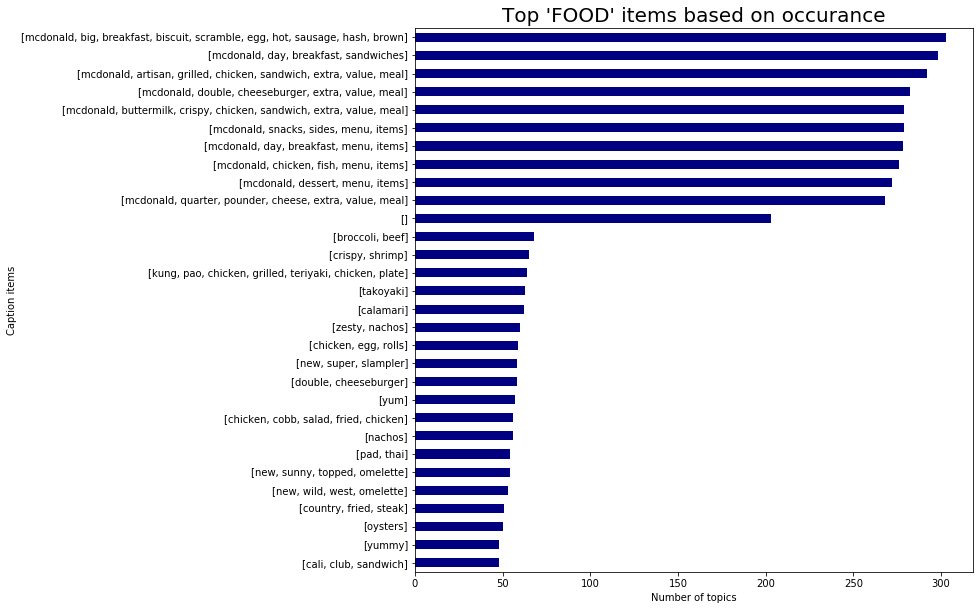

In [23]:
#Occurance of Top words "FOOD"
c_topics =  df_food['preproc'].value_counts().to_frame()[:30]
c_topics.sort_values(by='preproc', ascending=True).plot(kind='barh', colormap='jet', legend=False, figsize=(10, 10));
plt.title("Top 'FOOD' items based on occurance",fontsize = 20)
plt.ylabel('Caption items')
plt.xlabel('Number of topics')

In [64]:
#Join list of tokens to form a caption
df_preproc["preproc"]= df_preproc["preproc"].str.join(" ")

In [65]:
df_preproc[['caption', 'photo_id', 'preproc']].head(10)

,caption,photo_id,preproc
16,Outside,-bpyOFpGiJsOzh_y17cTMQ,outside
18,"""last neighborhood bar in Vegas""",YkW51dD0Hzw1572XLzrV5w,last neighborhood bar vegas
19,now this is a sandwich,fFf5HfvOZZBM_u-9fFSiHw,sandwich
20,Kai Restaurant,VTRKZpezwa25pyc8ePWLQQ,kai restaurant
21,Resort lounge.,2fp5KiQd91qw351ea2V4Xw,resort lounge
23,"Not the Blueberry Hill I go to, but close enough.",CGQz5KfDrUvMh3fIfrgk8A,blueberry hill close enough
26,The counter at Matt's Big Breakfast. I have a ...,wNTCPtF_FfxL-aPfg6_-8w,counter matt big breakfast strong hunch matt b...
28,A typical table at Coronado Cafe,yxkz1OIxe9hJAfTK_wYQ6w,typical table coronado cafe
31,from their website,_KKnMFElktEuOl5y6LdThg,website
32,From in front of the booth - you can see back ...,lY5tXCnwtGXY9E8yUuqKdQ,front booth see back kitchen


In [66]:
#Append dataframe by number of words in the caption
df_caption['number_of_words'] = df_preproc.preproc.apply(lambda x: len(x.split()))

C:\Users\BASAVARAJ\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [67]:
df_caption[['caption', 'photo_id', 'preproc','number_of_words']].head(10)

,caption,photo_id,preproc,number_of_words
16,Outside,-bpyOFpGiJsOzh_y17cTMQ,[outside],1
18,"""last neighborhood bar in Vegas""",YkW51dD0Hzw1572XLzrV5w,"[last, neighborhood, bar, vegas]",4
19,now this is a sandwich,fFf5HfvOZZBM_u-9fFSiHw,[sandwich],1
20,Kai Restaurant,VTRKZpezwa25pyc8ePWLQQ,"[kai, restaurant]",2
21,Resort lounge.,2fp5KiQd91qw351ea2V4Xw,"[resort, lounge]",2
23,"Not the Blueberry Hill I go to, but close enough.",CGQz5KfDrUvMh3fIfrgk8A,"[blueberry, hill, close, enough]",4
26,The counter at Matt's Big Breakfast. I have a ...,wNTCPtF_FfxL-aPfg6_-8w,"[counter, matt, big, breakfast, strong, hunch,...",8
28,A typical table at Coronado Cafe,yxkz1OIxe9hJAfTK_wYQ6w,"[typical, table, coronado, cafe]",4
31,from their website,_KKnMFElktEuOl5y6LdThg,[website],1
32,From in front of the booth - you can see back ...,lY5tXCnwtGXY9E8yUuqKdQ,"[front, booth, see, back, kitchen]",5


### Average number of words in caption after preprocessing

In [68]:
#Number of images with caption
nor_imgs=len(df_caption)

#Average number of words per image after preprocessing
sum=df_caption['number_of_words'].sum()
avg=sum/nor_imgs
print("Average number of words per image in caption after preprocessing: %f"%(avg))

Average number of words per image in caption after preprocessing: 4.124276


#### Reference
For Pre-processing using NLP


https://www.datacamp.com/community/tutorials/text-analytics-beginners-nltk

In [69]:
df_caption=df_caption[df_caption['label']=='food']
#Join list of tokens to form a caption
df_caption["preproc"]= df_caption["preproc"].str.join(" ")
df_caption

C:\Users\BASAVARAJ\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,caption,photo_id,business_id,label,number_of_words,clean,preproc,preproc_stopword_list,is_english
19,now this is a sandwich,fFf5HfvOZZBM_u-9fFSiHw,zU9w_xRlQSRIYXxGo-HSOA,food,1,now this sandwich,sandwich,[sandwich],True
37,chicken salad,VSlZb57DiRYiB5rSYHf8Aw,DYuOxkW4DtlJsTHdxdXSlg,food,2,chicken salad,chicken salad,"[chicken, salad]",True
62,Large Pizza with Black Olives,mU6dFgCOJQTHxnYINHVpWg,tYbK94fl50os3h_RjpY4gw,food,4,Large Pizza with Black Olives,large pizza black olives,"[large, pizza, black, olives]",True
74,"Best Ribs on the Planet. OK, so I took the ph...",UJkd_PoWNr18Yqhsb2jELA,4hG2j_ibsNblDgqei05U_g,food,7,Best Ribs the Planet took the photo after ate ...,best ribs planet take photo eat whatever,"[best, ribs, planet, take, photo, eat, whatever]",True
77,Club,gZfg0pt3XfMseo50Rx_3Wg,NvKNe9DnQavC9GstglcBJQ,food,1,Club,club,[club],True
...,...,...,...,...,...,...,...,...,...
199985,Cover of their to go box,aoqGy8WFGmoh9t-fhQEvBw,3MdLnbpkvTcsKkMszUv_3g,food,2,Cover their box,cover box,"[cover, box]",True
199988,Karaage,9uN3Gx6ziNEhbYgSsO4QHw,ZAuAwz1ijuydn5yL3q3rzA,food,1,Karaage,karaage,[karaage],True
199989,Takoyaki,iamvSe9AVHrFhgoWI7cGhA,ZAuAwz1ijuydn5yL3q3rzA,food,1,Takoyaki,takoyaki,[takoyaki],True
199991,Asian fusion Scottsdale,Beg6NltQC2dj79SBtFmZeg,04L9uKk6OixQ7ForUfPQLw,food,3,Asian fusion Scottsdale,asian fusion scottsdale,"[asian, fusion, scottsdale]",True


In [70]:
#drop unecessary
print("Droping fields...")
columns_to_drop = [ 'business_id','label','number_of_words', 'clean','is_english']
for column in columns_to_drop:
    if column in df_caption.columns:
        df_caption.drop(column, axis=1, inplace=True)
print("Droping fields...completed")

Droping fields...
Droping fields...completed


C:\Users\BASAVARAJ\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [71]:
df_caption

,caption,photo_id,preproc,preproc_stopword_list
19,now this is a sandwich,fFf5HfvOZZBM_u-9fFSiHw,sandwich,[sandwich]
37,chicken salad,VSlZb57DiRYiB5rSYHf8Aw,chicken salad,"[chicken, salad]"
62,Large Pizza with Black Olives,mU6dFgCOJQTHxnYINHVpWg,large pizza black olives,"[large, pizza, black, olives]"
74,"Best Ribs on the Planet. OK, so I took the ph...",UJkd_PoWNr18Yqhsb2jELA,best ribs planet take photo eat whatever,"[best, ribs, planet, take, photo, eat, whatever]"
77,Club,gZfg0pt3XfMseo50Rx_3Wg,club,[club]
...,...,...,...,...
199985,Cover of their to go box,aoqGy8WFGmoh9t-fhQEvBw,cover box,"[cover, box]"
199988,Karaage,9uN3Gx6ziNEhbYgSsO4QHw,karaage,[karaage]
199989,Takoyaki,iamvSe9AVHrFhgoWI7cGhA,takoyaki,[takoyaki]
199991,Asian fusion Scottsdale,Beg6NltQC2dj79SBtFmZeg,asian fusion scottsdale,"[asian, fusion, scottsdale]"


In [72]:
#save preprocessed dataframe to json
df_caption.to_json(r'C:\Users\BASAVARAJ\Project_MLDL_IPCV\DMA Yelp Food\captiondata.json')

In [39]:
for ind in df_caption:
    new=json.dump(json.loads(ind),indent=4,sort_keys=True)
#new=json.dumps(df_caption,indent=4)
#new.to_json(r'C:\Users\BASAVARAJ\Project_MLDL_IPCV\DMA Yelp Food\captiondata.json')

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [42]:
df_caption = df_caption.to_json()
with open('C:\\Users\\BASAVARAJ\\Project_MLDL_IPCV\\DMA Yelp Food\\captiondata.json', 'w') as json_file:
    json.dump(df_caption, json_file)

In [43]:
df_caption=df_caption.T

AttributeError: 'str' object has no attribute 'T'